In [1]:
import sys
import os
sys.path.append('../../../measure/amplifiers/gpib_instrument_control')
sys.path.append('../')
sys.path.append('../lmx2594/py')
import wavetek_8502
import hp_5340a
import hp_3478a
import pm_1038
import rf_if_converter
import numpy as np
import scipy.io as sio
import time
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

ps = wavetek_8502.Wavetek8502()
#cn = hp_5340a.Hp5340A()
#pm = pm_1038.Pm1038(hp_3478a.Hp3478A(), None, "pm_b1391_correctionFactors.mat", None)
ric = rf_if_converter.RfIfConverter('/dev/ttyUSB0', fosc=280e6, mash_order=3, levelMapFile='sn1_power_map_0_02_to_6GHz.mat')
#ric = rf_if_converter.RfIfConverter('/dev/ttyUSB0', fosc=280e6, mash_order=3, levelMapFile='sn0_power_map_0_01_to_6GHz.mat')
#ric = rf_if_converter.RfIfConverter('/dev/ttyUSB0', fosc=280e6, mash_order=3, levelMapFile='sn0_power_map_0_75_to_6GHz.mat')


Waiting for LMX2594 to boot
Booted successfully
Created LMX object wit fosc 280.0
FPD is 140.000000 MHz


In [2]:
fstart = 20e6;
fstop = 15e9;
fres = 10e6;
fsweep = np.linspace(fstart, fstop, int((fstop-fstart)/fres)+1);
chdivs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 192, 256, 384, 512, 768]);
divF = 7.5e9/chdivs;
divF = divF[np.logical_and(divF>=fstart, divF<=fstop)] 
divF = np.hstack((divF-0.00001, divF))

fsweep = np.sort(np.hstack((divF, fsweep)))



## Initial path measuremetns

In [8]:

highPathPower = []
ric.setPathHigh()
for f in fsweep:
    ric.p.setFrequency(f)
    highPathPower.append(ps.readChannelB(f))

ric.setPathLow()
lowPathPower = []
for f in fsweep:
    ric.p.setFrequency(f)
    lowPathPower.append(ps.readChannelB(f))

Text(0, 0.5, 'Power [dBm]')

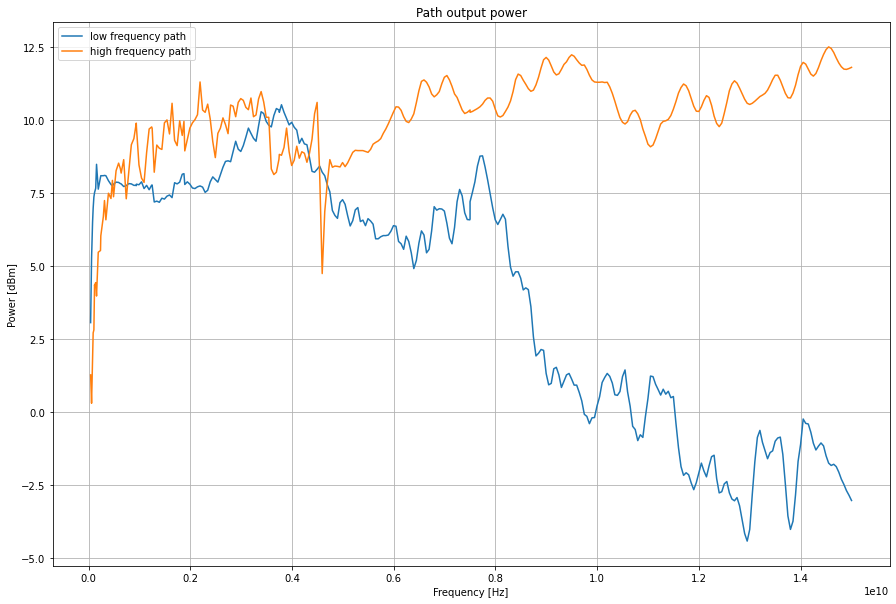

In [9]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, lowPathPower, label='low frequency path');
plt.plot(fsweep, highPathPower, label='high frequency path');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')

Text(0, 0.5, 'Power [dBm]')

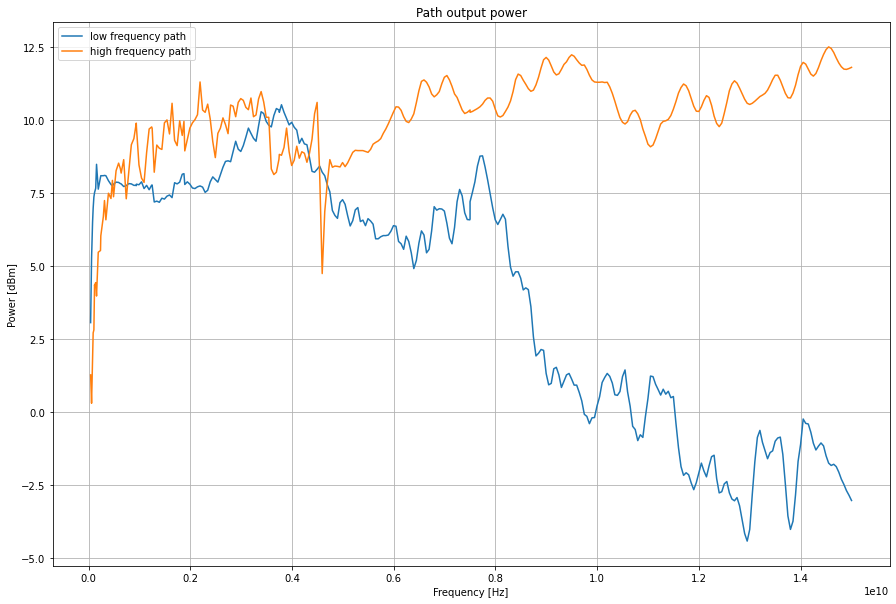

In [10]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, lowPathPower, label='low frequency path');
plt.plot(fsweep, highPathPower, label='high frequency path');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')

## Combined path measurements

In [5]:
powers = []
#powerSettings = [0, 1, 2, 3, 4, 8, 16, 32, 48, 63]
powerSettings = [0, 4, 16, 63]
powerSettings = range(64)
ric.setPathLow()
for p in powerSettings:
    print(p, end=' ')
    ric.p.setPower(p)
    power = []
    for f in fsweep:
        ric.p.setFrequency(f)
        power.append(ps.readChannelB(f))
    powers.append(power)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

Text(0, 0.5, 'Power [dBm]')

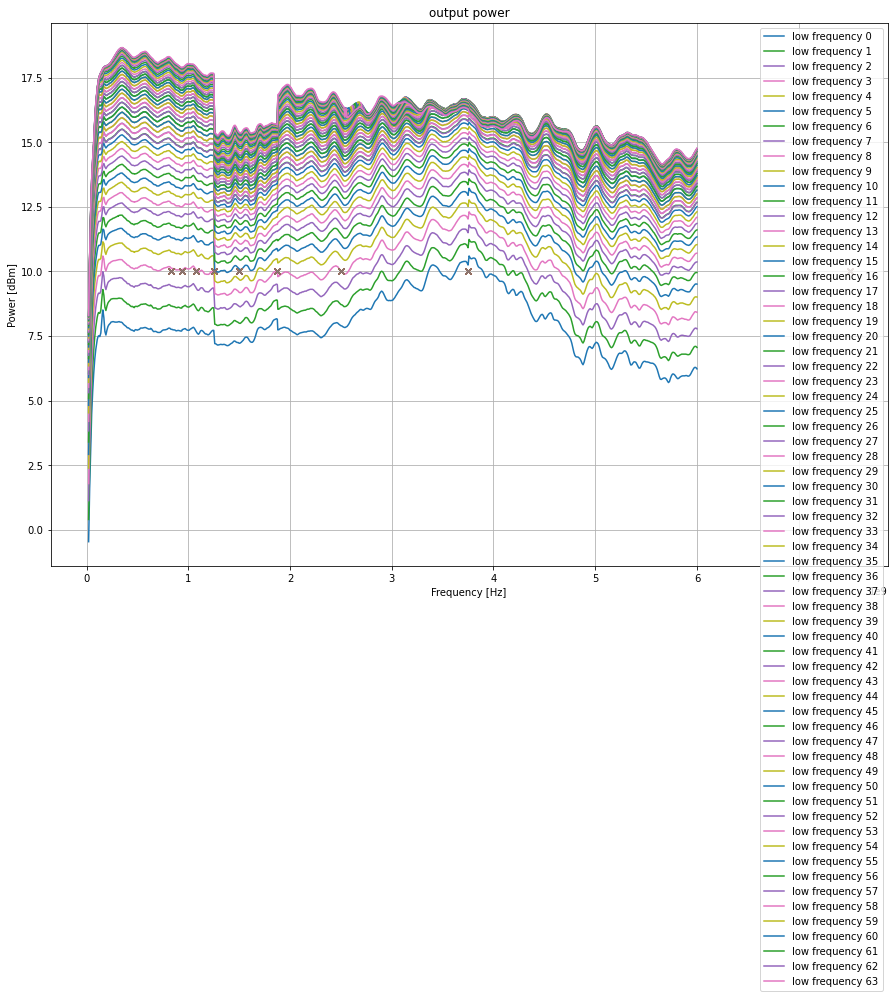

In [6]:
plt.figure()
plt.title('output power');
for i in range(len(powerSettings)):
    plt.plot(fsweep, powers[i], label='low frequency %d'%(powerSettings[i]));
    plt.plot( 7500e6/np.arange(1,10), [10]*9,'x')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
#plt.xlim([0, 1e9])
#plt.ylim([9, 11])


In [7]:
saveDict = {'fs':fsweep, 'ps':powerSettings, 'po':powers}
sio.savemat('sn1_power_map_0_02_to_6GHz.mat', saveDict)

## Frequency sweep with fixed power evaluation

In [3]:
powers = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, l=powerLevel)
    #powers.append(pm.readChannelA(f))
    powers.append(ps.readChannelB(f))
    

Text(0, 0.5, 'Power [dBm]')

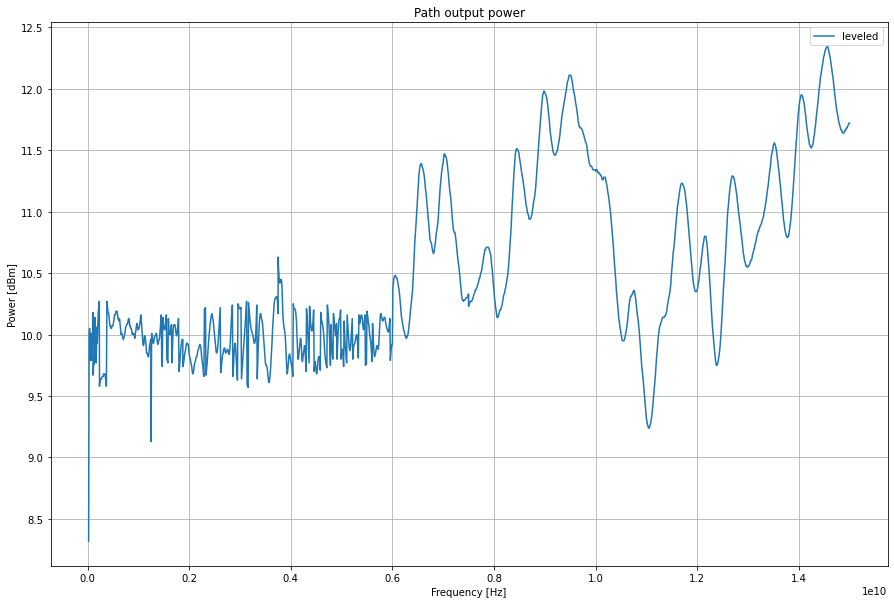

In [4]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, powers, label='leveled');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
#plt.xlim([80e6, 15e9])
#plt.ylim([9,11])

In [3]:
powers = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, l=powerLevel)
    #powers.append(pm.readChannelA(f))
    powers.append(ps.readChannelB(f))
    

Text(0, 0.5, 'Power [dBm]')

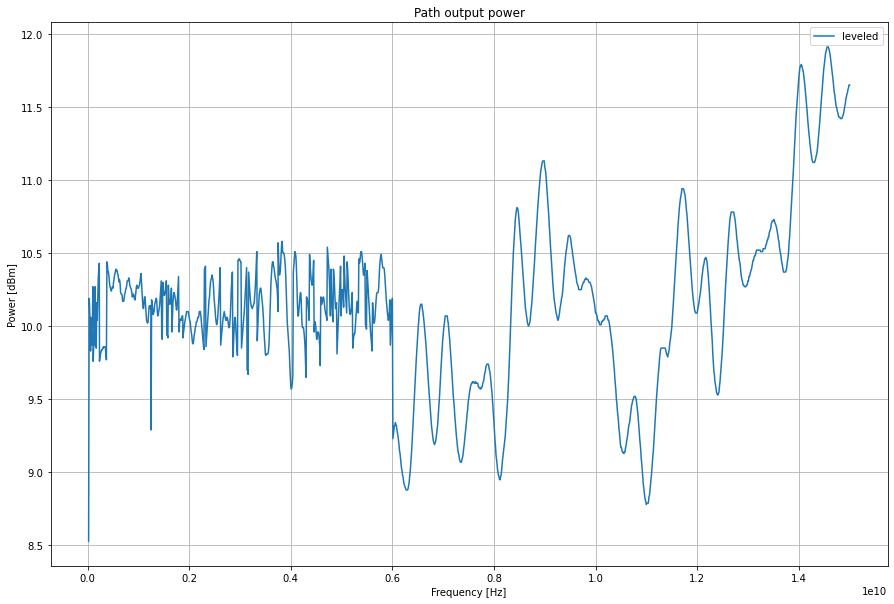

In [4]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, powers, label='leveled');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
#plt.xlim([80e6, 15e9])
#plt.ylim([9,11])

In [6]:
powers2 = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, powerLevel)
    #powers.append(pm.readChannelA(f))
    powers2.append(ps.readChannelB(f))
    

In [8]:
powers3 = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, powerLevel)
    #powers.append(pm.readChannelA(f))
    powers3.append(ps.readChannelB(f))

In [10]:
powers4 = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, powerLevel)
    #powers.append(pm.readChannelA(f))
    powers4.append(ps.readChannelB(f))

In [12]:
powers5 = []
powerLevel=10.0 

for f in fsweep:
    ric.setFrequency(f, powerLevel)
    #powers.append(pm.readChannelA(f))
    powers5.append(ps.readChannelB(f))

(9.0, 12.5)

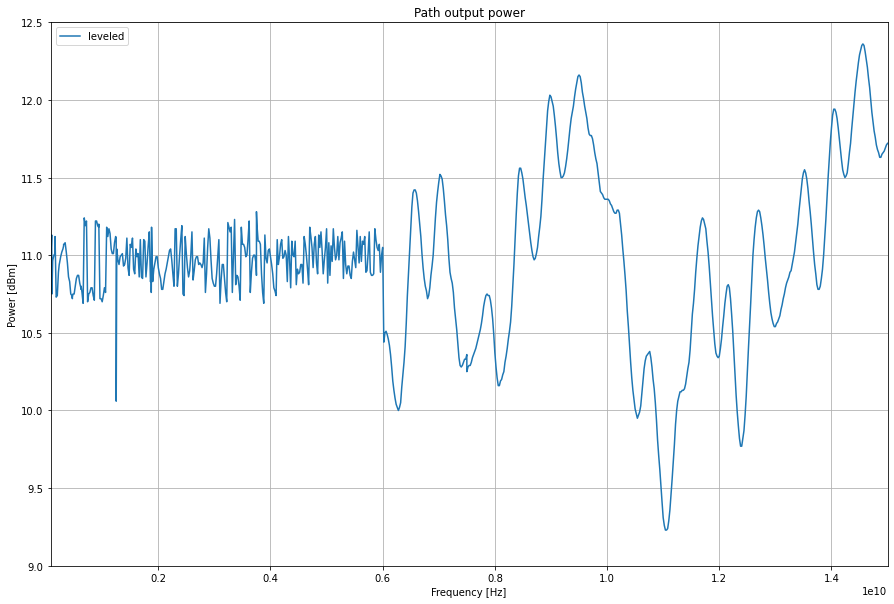

In [10]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, powers, label='leveled');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
plt.xlim([80e6, 15e9])
plt.ylim([9,12.5])

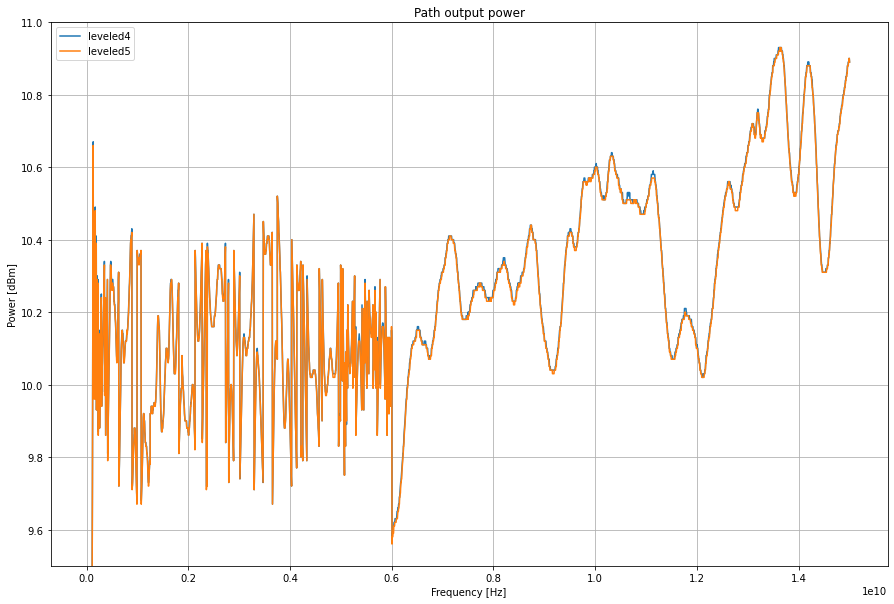

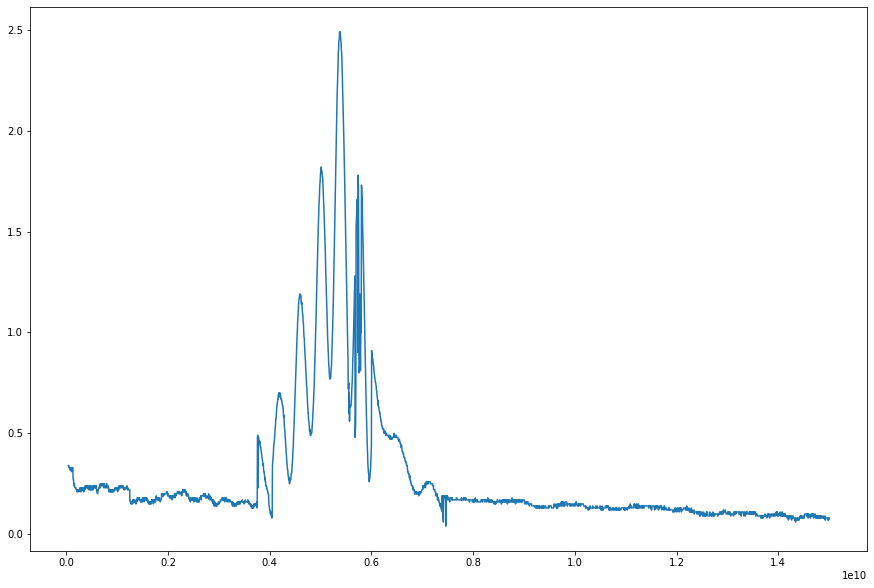

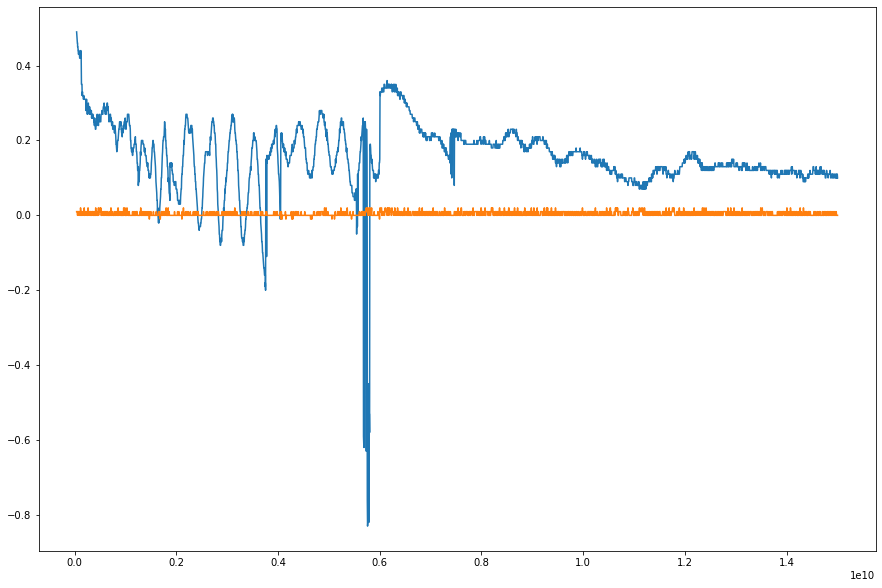

In [17]:
plt.figure()
plt.title('Path output power');
#plt.plot(fsweep, powers, label='leveled');
#plt.plot(fsweep, powers2, label='leveled2');
#plt.plot(fsweep, powers3, label='leveled3');
plt.plot(fsweep, powers4, label='leveled4');
plt.plot(fsweep, powers5, label='leveled5');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')

plt.ylim([9.5,11])

plt.figure()
plt.plot(fsweep, np.array(powers)-powers2)
plt.figure()
plt.plot(fsweep, np.array(powers)-powers4)
plt.plot(fsweep, np.array(powers4)-powers5)

## Low frequency measurements

In [43]:
fstart = 10e6;
fstop = 800e6;
fres = 10e6;
fsweep = np.linspace(fstart, fstop, int((fstop-fstart)/fres)+1);
chdivs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 192, 256, 384, 512, 768]);
divF = 7.5e9/chdivs;
divF = divF[np.logical_and(divF>=fstart, divF<=fstop)] 
divF = np.hstack((divF-0.00001, divF))

fsweep = np.sort(np.hstack((divF, fsweep)))

In [44]:
extAtt=8.0
powers = []
#powerSettings = [0, 1, 2, 3, 4, 8, 16, 32, 48, 63]
powerSettings = range(64)
for p in powerSettings:
    print(p, end=' ')
    power = []
    ric.p.setPower(p)
    time.sleep(1)
    for f in fsweep:
        ric.p.setFrequency(f)
        power.append(pm.readChannelA(f)+extAtt)
    powers.append(power)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 

Text(0, 0.5, 'Power [dBm]')

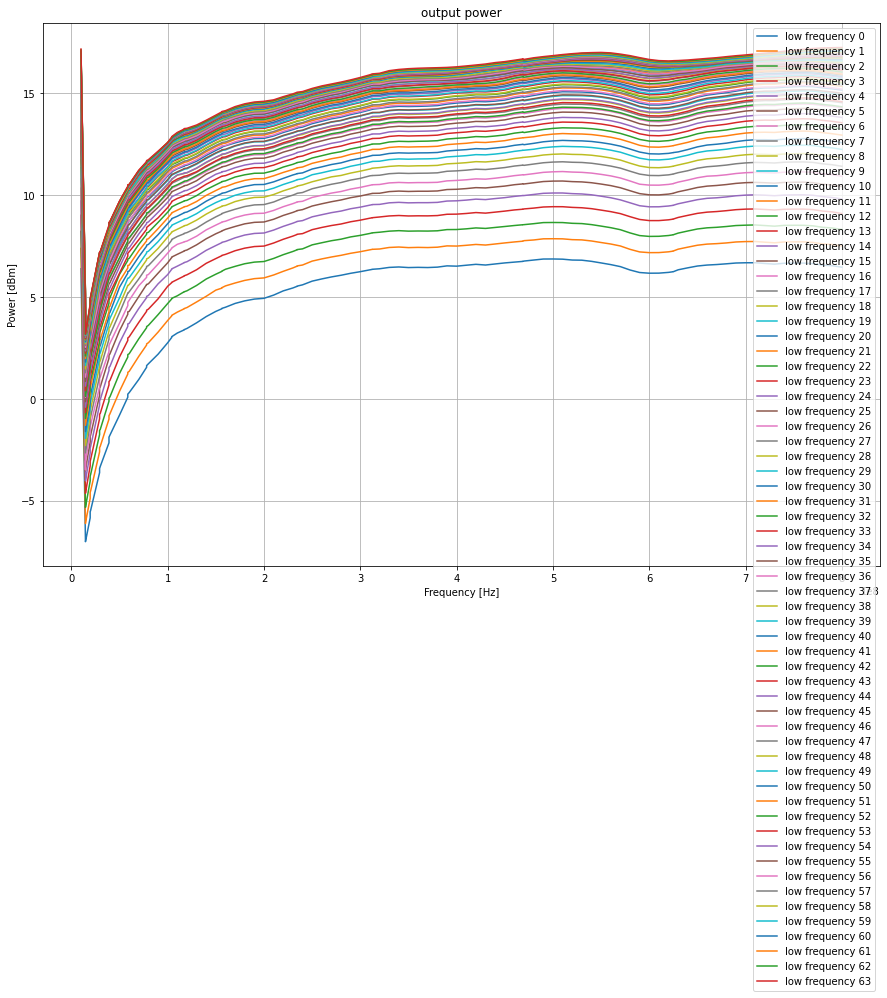

In [45]:
plt.figure()
plt.title('output power');
for i in range(len(powerSettings)):
    plt.plot(fsweep, powers[i], label='low frequency %d'%(powerSettings[i]));
    #plt.plot( 7500e6/np.arange(1,10), [10]*9,'x')
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')
#plt.ylim([9, 11])

In [46]:
saveDict = {'fs':fsweep, 'ps':powerSettings, 'po':powers}
sio.savemat('sn0_power_map_0_01_to_800MHz.mat', saveDict)

(64, 214)
(64,)


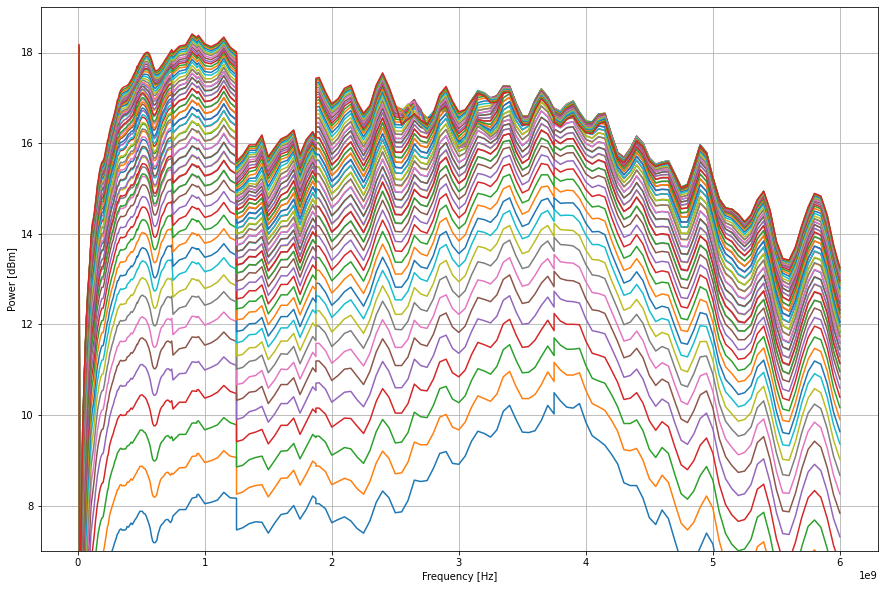

In [66]:
a = sio.loadmat('sn0_power_map_0_01_to_800MHz.mat')
fsweep = np.squeeze(a['fs'])[0:-6]
powerSettings = np.squeeze(a['ps'])
powers = (np.squeeze(a['po'])+1)[:, 0:-6]

a = sio.loadmat('sn0_power_map_0_75_to_6GHz.mat')
fsweep = np.hstack((fsweep, np.squeeze(a['fs'])))
#powerSettings = np.hstack((powerSettings, np.squeeze(a['ps'])))
powers = np.hstack((powers, np.squeeze(a['po'])))

print(powers.shape)
print(powerSettings.shape)
for i in range(len(powerSettings)):
    plt.plot(fsweep, powers[i], label='low frequency %d'%(powerSettings[i]));
    #plt.plot( 7500e6/np.arange(1,10), [10]*9,'x')
plt.grid(True)
plt.xlabel('Frequency [Hz]')

plt.ylabel('Power [dBm]')
plt.ylim([7, 19])

saveDict = {'fs':fsweep, 'ps':powerSettings, 'po':powers}
sio.savemat('sn0_power_map_0_01_to_6GHz.mat', saveDict)

## Sweep with low frequencies

In [3]:
fstart = 10e6;
fstop = 15e9;
fres = 50e6;
fsweep = np.linspace(fstart, fstop, int((fstop-fstart)/fres)+1);
chdivs = np.array([1, 2, 4, 6, 8, 12, 16, 24, 32, 48, 64, 72, 96, 128, 192, 256, 384, 512, 768]);
divF = 7.5e9/chdivs;
divF = divF[np.logical_and(divF>=fstart, divF<=fstop)] 
divF = np.hstack((divF-0.00001, divF))

fsweep = np.sort(np.hstack((divF, fsweep)))

In [4]:
powers = []
powerLevel=10.0 
extAtt=8
for f in fsweep:
    ric.setFrequency(f, powerLevel)
    powers.append(pm.readChannelA(f)+extAtt)
    

Text(0, 0.5, 'Power [dBm]')

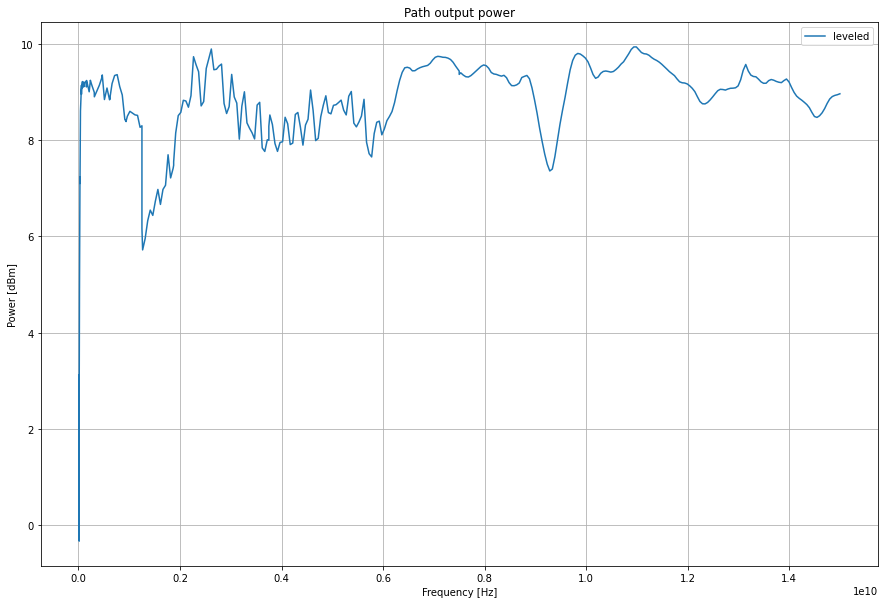

In [5]:
plt.figure()
plt.title('Path output power');
plt.plot(fsweep, powers, label='leveled');
plt.grid(True)
plt.xlabel('Frequency [Hz]')
plt.legend()
plt.ylabel('Power [dBm]')